# Titanic - Data part

In [523]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

Read & combine the data

In [524]:
train_raw = pd.read_csv("./Titanic-misc/train.csv")
test_raw = pd.read_csv("./Titanic-misc/test.csv")

#combine togeter due to issues in both datasets

df_all = pd.concat([train_raw,test_raw], sort=True).reset_index(drop=True)
df_all.describe(include="all")

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
count,1046.000000,295,1307,1308.000000,1309,1309.000000,1309.000000,1309.000000,1309,1309.000000,891.000000,1309
unique,NaN,186,3,NaN,1307,NaN,NaN,NaN,2,NaN,NaN,929
top,NaN,C23 C25 C27,S,NaN,"Connolly, Miss. Kate",NaN,NaN,NaN,male,NaN,NaN,CA. 2343
freq,NaN,6,914,NaN,2,NaN,NaN,NaN,843,NaN,NaN,11
mean,29.881138,NaN,NaN,33.295479,NaN,0.385027,655.000000,2.294882,NaN,0.498854,0.383838,NaN
std,14.413493,NaN,NaN,51.758668,NaN,0.865560,378.020061,0.837836,NaN,1.041658,0.486592,NaN
min,0.170000,NaN,NaN,0.000000,NaN,0.000000,1.000000,1.000000,NaN,0.000000,0.000000,NaN
25%,21.000000,NaN,NaN,7.895800,NaN,0.000000,328.000000,2.000000,NaN,0.000000,0.000000,NaN
50%,28.000000,NaN,NaN,14.454200,NaN,0.000000,655.000000,3.000000,NaN,0.000000,0.000000,NaN
75%,39.000000,NaN,NaN,31.275000,NaN,0.000000,982.000000,3.000000,NaN,1.000000,1.000000,NaN


# Cleaning
- Fill in missing values
- Remove Useless columns
- Remove outliers

Age - Fill NA with mean Pclass/Sex

In [525]:
df_all[df_all["Age"].isna()]

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
5,NaN,NaN,Q,8.4583,"Moran, Mr. James",0,6,3,male,0,0.0,330877
17,NaN,NaN,S,13.0000,"Williams, Mr. Charles Eugene",0,18,2,male,0,1.0,244373
19,NaN,NaN,C,7.2250,"Masselmani, Mrs. Fatima",0,20,3,female,0,1.0,2649
26,NaN,NaN,C,7.2250,"Emir, Mr. Farred Chehab",0,27,3,male,0,0.0,2631
28,NaN,NaN,Q,7.8792,"O'Dwyer, Miss. Ellen ""Nellie""",0,29,3,female,0,1.0,330959
...,...,...,...,...,...,...,...,...,...,...,...,...
1299,NaN,NaN,Q,7.7208,"Riordan, Miss. Johanna Hannah""""",0,1300,3,female,0,NaN,334915
1301,NaN,NaN,Q,7.7500,"Naughton, Miss. Hannah",0,1302,3,female,0,NaN,365237
1304,NaN,NaN,S,8.0500,"Spector, Mr. Woolf",0,1305,3,male,0,NaN,A.5. 3236
1307,NaN,NaN,S,8.0500,"Ware, Mr. Frederick",0,1308,3,male,0,NaN,359309


In [526]:
data_cleaned_corr = df_all.corr(numeric_only=True)
data_cleaned_corr["Age"].abs().sort_values(kind="quicksort",ascending=False)

Age            1.000000
Pclass         0.408106
SibSp          0.243699
Fare           0.178740
Parch          0.150917
Survived       0.077221
PassengerId    0.028814
Name: Age, dtype: float64

In [527]:
raw_Pclass_Sex = df_all.groupby(["Pclass","SibSp"], group_keys=False)["Age"]
raw_Pclass_Sex.mean()

Pclass  SibSp
1       0        39.033333
        1        39.943178
        2        39.125000
        3        23.500000
2       0        31.104398
        1        27.767317
        2        19.250000
        3        30.000000
3       0        27.055311
        1        23.576044
        2        19.031250
        3        12.454545
        4         8.772727
        5        10.166667
        8        14.500000
Name: Age, dtype: float64

In [528]:
df_all['Age'] = df_all.groupby(["Pclass","SibSp"], group_keys=False)["Age"].apply(lambda x: x.fillna(x.mean()))

In [529]:
#according to https://www.encyclopedia-titanica.org/titanic-victim/constance-gladys-sage.html

idx = df_all[df_all["PassengerId"]==181].index #Sage, Miss. Constance Gladys
df_all.loc[idx,"Age"] = 7 #

idx = df_all[df_all["PassengerId"]==793].index
df_all.loc[idx,"Age"] = 20.73

idx = df_all[df_all["PassengerId"]==864].index
df_all.loc[idx,"Age"] = 14.60

idx = df_all[df_all["PassengerId"]==1080].index
df_all.loc[idx,"Age"] = 10.41

Embarked

In [530]:
df_all["Embarked"] = df_all["Embarked"].fillna("S") # Mrs Stone boarded the Titanic in Southampton
# https://www.encyclopedia-titanica.org/titanic-survivor/martha-evelyn-stone.html

Fare

In [531]:
df_all[df_all["Fare"].isnull()]

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
1043,60.5,NaN,S,NaN,"Storey, Mr. Thomas",0,1044,3,male,0,NaN,3701


In [532]:
df_all["Fare"] = df_all.groupby(by=["Pclass","Sex"], group_keys=False)["Fare"].apply(lambda x: x.fillna(x.mean()))

In [533]:
df_all[df_all["PassengerId"]==1044]

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
1043,60.5,NaN,S,12.415462,"Storey, Mr. Thomas",0,1044,3,male,0,NaN,3701


In [534]:
# Fill in zero values

df_all["Fare"] = df_all["Fare"].replace(0,np.NaN)
df_all["Fare"] = df_all.groupby(["Pclass","Sex"], group_keys=False)["Fare"].apply(lambda x: x.fillna(x.mean()))

Cabin

In [535]:
df_all[df_all["Cabin"].isna()]

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
0,22.000000,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171
2,26.000000,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282
4,35.000000,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450
5,27.055311,NaN,Q,8.4583,"Moran, Mr. James",0,6,3,male,0,0.0,330877
7,2.000000,NaN,S,21.0750,"Palsson, Master. Gosta Leonard",1,8,3,male,3,0.0,349909
...,...,...,...,...,...,...,...,...,...,...,...,...
1303,28.000000,NaN,S,7.7750,"Henriksson, Miss. Jenny Lovisa",0,1304,3,female,0,NaN,347086
1304,27.055311,NaN,S,8.0500,"Spector, Mr. Woolf",0,1305,3,male,0,NaN,A.5. 3236
1306,38.500000,NaN,S,7.2500,"Saether, Mr. Simon Sivertsen",0,1307,3,male,0,NaN,SOTON/O.Q. 3101262
1307,27.055311,NaN,S,8.0500,"Ware, Mr. Frederick",0,1308,3,male,0,NaN,359309


In [536]:
df_all["Deck"] = df_all["Cabin"].str[:1]
df_all["Deck"] = df_all["Deck"].fillna("M")
df_all.groupby(["Deck","Pclass"])["Survived"].sum()

Deck  Pclass
A     1           7.0
B     1          35.0
C     1          35.0
D     1          22.0
      2           3.0
E     1          18.0
      2           3.0
      3           3.0
F     2           7.0
      3           1.0
G     3           2.0
M     1          19.0
      2          74.0
      3         113.0
T     1           0.0
Name: Survived, dtype: float64

In [537]:
# Update Deck T to Highest A
idx = df_all[df_all["Cabin"]=="T"].index
df_all.loc[idx,"Deck"] = "A"

# Group 1st class passengers
df_all["Deck"] = df_all["Deck"].replace(["A","B","C"],"ABC")
df_all["Deck"] = df_all["Deck"].replace(["D","E"],"DE")
df_all["Deck"] = df_all["Deck"].replace(["F","G"],"FG")

# Updated most expensive tickets to ABC
idx = df_all[(df_all["Fare"]>df_all["Fare"].quantile(0.99)) & (df_all["Deck"]=="M")].index
df_all.loc[idx,"Deck"] = "ABC"

In [538]:
df_all.drop(columns=["Cabin"], inplace=True)
df_all.describe(include="all")

,Age,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Deck
count,1309.000000,1309,1309.000000,1309,1309.000000,1309.000000,1309.000000,1309,1309.000000,891.000000,1309,1309
unique,NaN,3,NaN,1307,NaN,NaN,NaN,2,NaN,NaN,929,4
top,NaN,S,NaN,"Connolly, Miss. Kate",NaN,NaN,NaN,male,NaN,NaN,CA. 2343,M
freq,NaN,916,NaN,2,NaN,NaN,NaN,843,NaN,NaN,11,1013
mean,29.474055,NaN,33.801277,NaN,0.385027,655.000000,2.294882,NaN,0.498854,0.383838,NaN,NaN
std,13.171680,NaN,51.700681,NaN,0.865560,378.020061,0.837836,NaN,1.041658,0.486592,NaN,NaN
min,0.170000,NaN,3.170800,NaN,0.000000,1.000000,1.000000,NaN,0.000000,0.000000,NaN,NaN
25%,22.000000,NaN,7.925000,NaN,0.000000,328.000000,2.000000,NaN,0.000000,0.000000,NaN,NaN
50%,27.055311,NaN,14.500000,NaN,0.000000,655.000000,3.000000,NaN,0.000000,0.000000,NaN,NaN
75%,37.000000,NaN,31.387500,NaN,0.000000,982.000000,3.000000,NaN,1.000000,1.000000,NaN,NaN


Drop useless columns

In [539]:
df_all.drop(columns=["PassengerId","Ticket","Name"], inplace=True)
df_all.describe(include="all")

,Age,Embarked,Fare,Parch,Pclass,Sex,SibSp,Survived,Deck
count,1309.000000,1309,1309.000000,1309.000000,1309.000000,1309,1309.000000,891.000000,1309
unique,NaN,3,NaN,NaN,NaN,2,NaN,NaN,4
top,NaN,S,NaN,NaN,NaN,male,NaN,NaN,M
freq,NaN,916,NaN,NaN,NaN,843,NaN,NaN,1013
mean,29.474055,NaN,33.801277,0.385027,2.294882,NaN,0.498854,0.383838,NaN
std,13.171680,NaN,51.700681,0.865560,0.837836,NaN,1.041658,0.486592,NaN
min,0.170000,NaN,3.170800,0.000000,1.000000,NaN,0.000000,0.000000,NaN
25%,22.000000,NaN,7.925000,0.000000,2.000000,NaN,0.000000,0.000000,NaN
50%,27.055311,NaN,14.500000,0.000000,3.000000,NaN,0.000000,0.000000,NaN
75%,37.000000,NaN,31.387500,0.000000,3.000000,NaN,1.000000,1.000000,NaN


# Feature Engineering

Fare to Bins

In [540]:
df_all["Fare"] = pd.qcut(df_all["Fare"],8)

<AxesSubplot: xlabel='Fare', ylabel='count'>

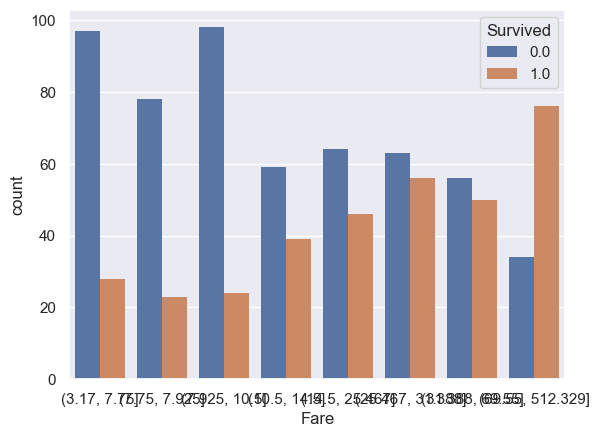

In [541]:
sns.countplot(data=df_all, x="Fare", hue="Survived", linewidth=0)

Age to Bins

<AxesSubplot: xlabel='Age', ylabel='count'>

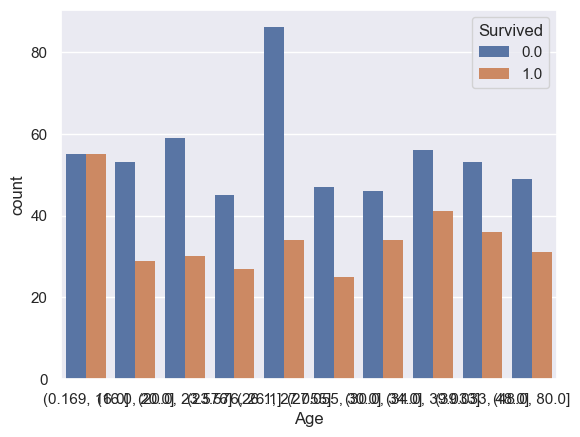

In [542]:
df_all["Age"] = pd.qcut(df_all["Age"],10, duplicates="drop")
sns.countplot(data=df_all, x="Age", hue="Survived", linewidth=0)

Family size - S/M/L

In [543]:
df_all["Family_size"] = df_all["Parch"] + df_all["SibSp"] + 1
df_all.groupby(["Family_size"]).sum()

/var/folders/nr/pxyxhh4s2vl120p6__1g3z2c0000gn/T/ipykernel_18012/1078557145.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_all.groupby(["Family_size"]).sum()


,Parch,Pclass,SibSp,Survived
Family_size,,,,
1,0,1892,0,163.0
2,52,445,183,89.0
3,176,354,142,59.0
4,73,91,56,21.0
5,44,55,44,3.0
6,55,62,70,3.0
7,44,48,52,4.0
8,24,24,32,0.0
11,36,33,74,0.0


In [544]:
family_map = {1: "small",
              2: "medium", 
              3: "medium-large",
              4: "large",
              5: "xlarge", 6: "xlarge",7: "xlarge", 8: "xlarge",9: "xlarge", 10: "xlarge",11: "xlarge"}

df_all["Family_bin"] = df_all["Family_size"].map(family_map)
df_all.drop(columns=["Family_size", "SibSp", "Parch"], inplace=True)

In [545]:
df_all.describe(include="all")

,Age,Embarked,Fare,Pclass,Sex,Survived,Deck,Family_bin
count,1309,1309,1309,1309.000000,1309,891.000000,1309,1309
unique,10,3,8,NaN,2,NaN,4,5
top,"(26.1, 27.055]",S,"(3.17, 7.75]",NaN,male,NaN,M,small
freq,188,916,193,NaN,843,NaN,1013,790
mean,NaN,NaN,NaN,2.294882,NaN,0.383838,NaN,NaN
std,NaN,NaN,NaN,0.837836,NaN,0.486592,NaN,NaN
min,NaN,NaN,NaN,1.000000,NaN,0.000000,NaN,NaN
25%,NaN,NaN,NaN,2.000000,NaN,0.000000,NaN,NaN
50%,NaN,NaN,NaN,3.000000,NaN,0.000000,NaN,NaN
75%,NaN,NaN,NaN,3.000000,NaN,1.000000,NaN,NaN


# Categorical to Numerical

In [546]:
df_all["Is_male"] = df_all["Sex"].map({"male":1,"female":0})
df_all.drop(columns=["Sex"], inplace=True)

df_all_dummies = pd.get_dummies(df_all,drop_first=True)

df_all_dummies.describe(include="all")

,Pclass,Survived,Is_male,"Age_(16.0, 20.0]","Age_(20.0, 23.576]","Age_(23.576, 26.1]","Age_(26.1, 27.055]","Age_(27.055, 30.0]","Age_(30.0, 34.0]","Age_(34.0, 39.033]",...,"Fare_(25.467, 31.388]","Fare_(31.388, 69.55]","Fare_(69.55, 512.329]",Deck_DE,Deck_FG,Deck_M,Family_bin_medium,Family_bin_medium-large,Family_bin_small,Family_bin_xlarge
count,1309.000000,891.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,...,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000
mean,2.294882,0.383838,0.644003,0.091673,0.112299,0.085561,0.143621,0.080214,0.080978,0.103132,...,0.126814,0.122231,0.124523,0.066463,0.019862,0.773873,0.179526,0.121467,0.603514,0.062643
std,0.837836,0.486592,0.478997,0.288674,0.315855,0.279822,0.350839,0.271728,0.272905,0.304248,...,0.332892,0.327677,0.330303,0.249185,0.139581,0.418482,0.383939,0.326794,0.489354,0.242413
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,3.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,3.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
max,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Relax assumptions
- non linearity (now)
- endogeniety  (later)
- normality / homoscedasticity N(err) (later)
- multicolinearity (now)

multicolinearity

In [547]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
indepentent_set = df_all_dummies.drop(columns="Survived")

vif["features"] = indepentent_set.columns
vif["VIF"] = [variance_inflation_factor(indepentent_set.values,i) for i in range(len(indepentent_set.columns))]

vif.sort_values(by="VIF", ascending=False)

,features,VIF
0,Pclass,28.836225
25,Family_bin_small,16.750805
22,Deck_M,16.031429
23,Family_bin_medium,5.537413
12,Embarked_S,5.233785
24,Family_bin_medium-large,4.071492
1,Is_male,3.235715
26,Family_bin_xlarge,3.192546
5,"Age_(26.1, 27.055]",3.097499
19,"Fare_(69.55, 512.329]",2.702289


Scaling

In [548]:
train_set = df_all_dummies[df_all_dummies["Survived"].notna()]
train_set_inputs = train_set.drop(columns="Survived")
train_set_outputs = train_set["Survived"]

test_set = df_all_dummies[df_all_dummies["Survived"].isna()]
test_set_inputs = test_set.drop(columns="Survived")

In [549]:
from sklearn import preprocessing

scaler = preprocessing.StandardScaler()
scaler.fit(train_set_inputs)

train_inputs_scaled = scaler.transform(train_set_inputs)
train_targets = train_set_outputs

test_inputs_scaled = scaler.transform(test_set_inputs)

In [550]:
np.savez("./Titanic-misc/train.npz",inputs = train_inputs_scaled, outputs = train_targets)

In [551]:
np.savez("./Titanic-misc/test.npz",inputs = test_inputs_scaled)